<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcoteran/ml/blob/master/notebooks/ml_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab" title="Abrir y ejecutar en Google Colaboratory"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marcoteran/ml/blob/master/notebooks/ml_regression.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Abrir en Kaggle" title="Abrir y ejecutar en Kaggle"/></a>
  </td>
</table>

# Sesión 02: Regresión Lineal y Logística
## Guía Completa

**Machine Learning**

**Profesor:** Marco Terán  
**Fecha:** 2025

[Website](http://marcoteran.github.io/),
[Github](https://github.com/marcoteran),
[LinkedIn](https://www.linkedin.com/in/marcoteran/).
___

## 📋 Tabla de Contenidos

1. **[Introducción y Setup](#1-introducción-y-setup)**
2. **[Regresión Lineal Simple](#2-regresión-lineal-simple)**
3. **[Regresión Lineal Múltiple](#3-regresión-lineal-múltiple)**
4. **[Gradient Descent desde Cero](#4-gradient-descent-desde-cero)**
6. **[Regularización](#6-regularización)**
7. **[Regresión Logística](#7-regresión-logística)**
8. **[Métricas de Clasificación](#8-métricas-de-clasificación)**
9. **[Casos Prácticos Reales](#9-casos-prácticos-reales)**
10. **[Proyecto Final Integrador](#10-proyecto-final-integrador)**

---

## 1. Introducción y Setup

### 📖 Teoría: ¿Qué es la Regresión?

La **regresión** es una técnica de aprendizaje supervisado que busca modelar la relación entre variables. Existen dos tipos principales:

- **Regresión Lineal**: Predice valores continuos (precios, temperaturas, ventas)
- **Regresión Logística**: Predice probabilidades/categorías (spam/no spam, aprobado/rechazado)

---

## 🔧 Instalación y Configuración del Entorno

In [9]:
# Importar todas las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

# Librerías de Machine Learning
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, ElasticNet,
                                  LogisticRegression, RidgeCV, LassoCV)
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score,
                           accuracy_score, precision_score, recall_score, f1_score,
                           confusion_matrix, roc_curve, auc, roc_auc_score, classification_report)
from sklearn.datasets import load_diabetes, load_breast_cancer, load_iris

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Semilla para reproducibilidad
np.random.seed(42)

print("✅ Librerías cargadas exitosamente")
print(f"📊 Versiones:")
print(f"  • NumPy: {np.__version__}")
print(f"  • Pandas: {pd.__version__}")
print(f"  • Scikit-learn: {sklearn.__version__}")

✅ Librerías cargadas exitosamente
📊 Versiones:
  • NumPy: 1.26.4
  • Pandas: 2.3.3
  • Scikit-learn: 1.7.2


It also requires Scikit-Learn ≥ 1.0.1:

### 🎨 Funciones de Utilidad para Visualización

In [2]:
# Paleta de colores consistente
COLORS = {
    'primary': '#2E86AB',
    'secondary': '#A23B72',
    'accent': '#F18F01',
    'success': '#73AB84',
    'warning': '#C73E1D',
    'dark': '#2D3142',
    'light': '#F0F0F0'
}

def plot_style(ax, title="", xlabel="", ylabel=""):
    """Aplicar estilo consistente a los gráficos"""
    ax.set_title(title, fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

def print_section(title):
    """Imprimir título de sección con estilo"""
    print("\n" + "="*60)
    print(f"  {title}")
    print("="*60 + "\n")

---

## 2. Regresión Lineal Simple

### 📖 Teoría: Modelo Lineal Simple

El modelo de regresión lineal simple busca una relación lineal entre una variable independiente $x$ y una variable dependiente $y$:

$$y = \theta_0 + \theta_1 x + \epsilon$$

Donde:
- $\theta_0$: Intercepto (bias)
- $\theta_1$: Pendiente (peso)
- $\epsilon$: Error aleatorio

### 💻 Implementación desde Cero

In [4]:
print_section("2.1 REGRESIÓN LINEAL SIMPLE - IMPLEMENTACIÓN MANUAL")

class SimpleLinearRegression:
    """
    Implementación desde cero de Regresión Lineal Simple
    usando la ecuación normal (método de mínimos cuadrados)
    """
    
    def __init__(self):
        self.theta_0 = None  # Intercepto
        self.theta_1 = None  # Pendiente
        self.r_squared = None
        
    def fit(self, X, y):
        """
        Ajustar el modelo usando la ecuación normal
        θ₁ = Σ((x - x̄)(y - ȳ)) / Σ((x - x̄)²)
        θ₀ = ȳ - θ₁x̄
        """
        X = np.array(X).flatten()
        y = np.array(y).flatten()
        
        # Calcular medias
        x_mean = np.mean(X)
        y_mean = np.mean(y)
        
        # Calcular pendiente
        numerator = np.sum((X - x_mean) * (y - y_mean))
        denominator = np.sum((X - x_mean) ** 2)
        self.theta_1 = numerator / denominator
        
        # Calcular intercepto
        self.theta_0 = y_mean - self.theta_1 * x_mean
        
        # Calcular R²
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - y_mean) ** 2)
        self.r_squared = 1 - (ss_res / ss_tot)
        
        return self
    
    def predict(self, X):
        """Realizar predicciones"""
        X = np.array(X).flatten()
        return self.theta_0 + self.theta_1 * X
    
    def get_equation(self):
        """Obtener ecuación del modelo"""
        return f"y = {self.theta_0:.2f} + {self.theta_1:.2f}x"
    
    def plot_fit(self, X, y, title="Regresión Lineal Simple"):
        """Visualizar el ajuste del modelo"""
        X = np.array(X).flatten()
        y = np.array(y).flatten()
        
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Gráfico de ajuste
        axes[0].scatter(X, y, alpha=0.6, s=50, color=COLORS['accent'], 
                       edgecolors='black', linewidth=0.5, label='Datos reales')
        
        # Línea de regresión
        X_line = np.linspace(X.min(), X.max(), 100)
        y_pred_line = self.predict(X_line)
        axes[0].plot(X_line, y_pred_line, color=COLORS['primary'], 
                    linewidth=2, label=self.get_equation())
        
        # Residuos
        y_pred = self.predict(X)
        for xi, yi, yi_pred in zip(X, y, y_pred):
            axes[0].plot([xi, xi], [yi, yi_pred], 'k--', alpha=0.3, linewidth=0.8)
        
        plot_style(axes[0], title, "X", "Y")
        axes[0].legend()
        
        # Añadir métricas
        mse = np.mean((y - y_pred) ** 2)
        mae = np.mean(np.abs(y - y_pred))
        axes[0].text(0.05, 0.95, f'R² = {self.r_squared:.4f}\nMSE = {mse:.4f}\nMAE = {mae:.4f}',
                    transform=axes[0].transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        
        # Gráfico de residuos
        residuals = y - y_pred
        axes[1].scatter(y_pred, residuals, alpha=0.6, s=50, 
                       color=COLORS['secondary'], edgecolors='black', linewidth=0.5)
        axes[1].axhline(y=0, color='red', linestyle='--', linewidth=1)
        axes[1].fill_between([y_pred.min(), y_pred.max()], 
                            [-2*residuals.std(), -2*residuals.std()],
                            [2*residuals.std(), 2*residuals.std()],
                            alpha=0.2, color='gray', label='±2σ')
        
        plot_style(axes[1], "Análisis de Residuos", "Valores Predichos", "Residuos")
        axes[1].legend()
        
        plt.tight_layout()
        plt.show()



  2.1 REGRESIÓN LINEAL SIMPLE - IMPLEMENTACIÓN MANUAL



📊 Generando datos sintéticos para demostración...
✅ Modelo entrenado:
   Ecuación: y = 10.43 + 2.41x
   R²: 0.9403


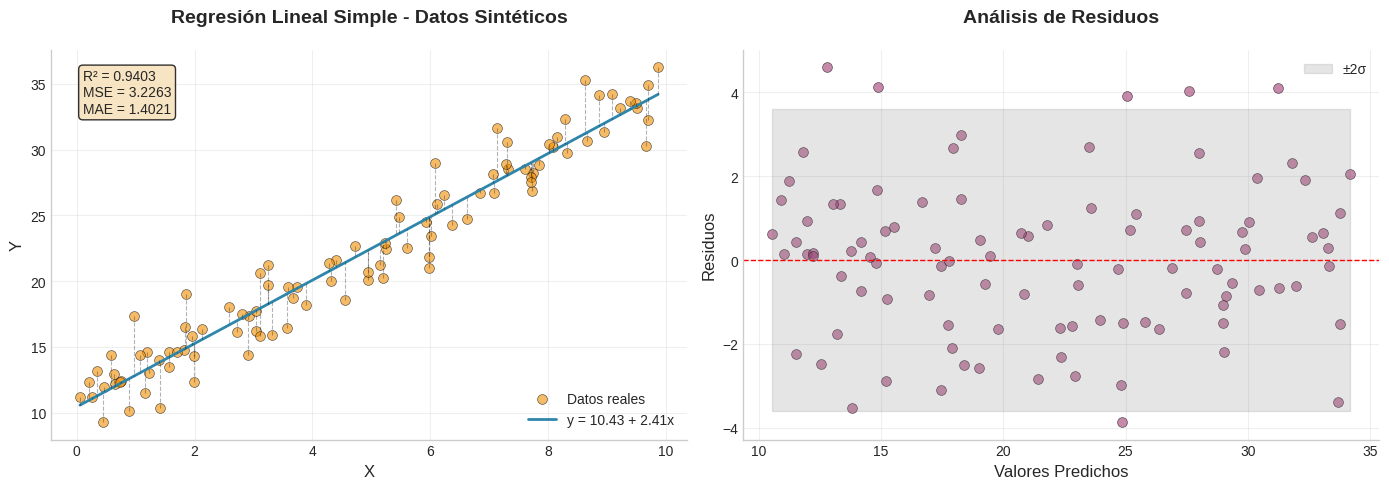

In [5]:
# Ejemplo con datos sintéticos
print("📊 Generando datos sintéticos para demostración...")
np.random.seed(42)
X_simple = np.random.uniform(0, 10, 100)
y_simple = 2.5 * X_simple + 10 + np.random.normal(0, 2, 100)

# Entrenar modelo
model_simple = SimpleLinearRegression()
model_simple.fit(X_simple, y_simple)

print(f"✅ Modelo entrenado:")
print(f"   Ecuación: {model_simple.get_equation()}")
print(f"   R²: {model_simple.r_squared:.4f}")

# Visualizar
model_simple.plot_fit(X_simple, y_simple, "Regresión Lineal Simple - Datos Sintéticos")

### 📊 Comparación con Scikit-learn

In [6]:
print_section("2.2 COMPARACIÓN CON SCIKIT-LEARN")

# Usar scikit-learn
from sklearn.linear_model import LinearRegression

# Preparar datos (sklearn espera matrices 2D)
X_sklearn = X_simple.reshape(-1, 1)

# Entrenar modelo
model_sklearn = LinearRegression()
model_sklearn.fit(X_sklearn, y_simple)

# Comparar resultados
print("📊 Comparación de resultados:")
print(f"{'Método':<20} {'θ₀ (Intercepto)':<15} {'θ₁ (Pendiente)':<15} {'R²':<10}")
print("-" * 60)
print(f"{'Implementación':<20} {model_simple.theta_0:<15.4f} {model_simple.theta_1:<15.4f} {model_simple.r_squared:<10.4f}")
print(f"{'Scikit-learn':<20} {model_sklearn.intercept_:<15.4f} {model_sklearn.coef_[0]:<15.4f} {model_sklearn.score(X_sklearn, y_simple):<10.4f}")
print("\n✅ Los resultados son idénticos, validando nuestra implementación!")


  2.2 COMPARACIÓN CON SCIKIT-LEARN

📊 Comparación de resultados:
Método               θ₀ (Intercepto) θ₁ (Pendiente)  R²        
------------------------------------------------------------
Implementación       10.4302         2.4080          0.9403    
Scikit-learn         10.4302         2.4080          0.9403    

✅ Los resultados son idénticos, validando nuestra implementación!


### 🎯 Ejercicio Interactivo: Efecto de Outliers

In [7]:
print_section("2.3 EFECTO DE OUTLIERS EN REGRESIÓN LINEAL")

def demonstrate_outlier_effect():
    """Demostrar cómo los outliers afectan la regresión lineal"""
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Datos originales
    np.random.seed(42)
    X = np.random.uniform(0, 10, 50)
    y = 2 * X + 5 + np.random.normal(0, 1, 50)
    
    # Sin outliers
    model1 = LinearRegression()
    model1.fit(X.reshape(-1, 1), y)
    axes[0].scatter(X, y, alpha=0.6, color=COLORS['accent'])
    axes[0].plot(X, model1.predict(X.reshape(-1, 1)), 
                color=COLORS['primary'], linewidth=2)
    plot_style(axes[0], "Sin Outliers", "X", "Y")
    axes[0].text(0.05, 0.95, f'R² = {model1.score(X.reshape(-1, 1), y):.3f}',
                transform=axes[0].transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightgreen'))
    
    # Con 1 outlier
    X_out1 = np.append(X, [9.5])
    y_out1 = np.append(y, [50])  # Outlier
    model2 = LinearRegression()
    model2.fit(X_out1.reshape(-1, 1), y_out1)
    axes[1].scatter(X, y, alpha=0.6, color=COLORS['accent'])
    axes[1].scatter([9.5], [50], color='red', s=100, marker='x', linewidth=3)
    axes[1].plot(X_out1, model2.predict(X_out1.reshape(-1, 1)), 
                color=COLORS['primary'], linewidth=2)
    plot_style(axes[1], "Con 1 Outlier", "X", "Y")
    axes[1].text(0.05, 0.95, f'R² = {model2.score(X_out1.reshape(-1, 1), y_out1):.3f}',
                transform=axes[1].transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='yellow'))
    
    # Con 3 outliers
    X_out3 = np.append(X, [9.5, 8.5, 7.5])
    y_out3 = np.append(y, [50, 45, 40])  # Outliers
    model3 = LinearRegression()
    model3.fit(X_out3.reshape(-1, 1), y_out3)
    axes[2].scatter(X, y, alpha=0.6, color=COLORS['accent'])
    axes[2].scatter([9.5, 8.5, 7.5], [50, 45, 40], color='red', 
                   s=100, marker='x', linewidth=3)
    axes[2].plot(np.sort(X_out3), model3.predict(np.sort(X_out3).reshape(-1, 1)), 
                color=COLORS['primary'], linewidth=2)
    plot_style(axes[2], "Con 3 Outliers", "X", "Y")
    axes[2].text(0.05, 0.95, f'R² = {model3.score(X_out3.reshape(-1, 1), y_out3):.3f}',
                transform=axes[2].transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightcoral'))
    
    plt.suptitle("Impacto de Outliers en Regresión Lineal", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print("⚠️ Observaciones:")
    print("  • Los outliers pueden cambiar dramáticamente la línea de regresión")
    print("  • El R² disminuye significativamente con outliers")
    print("  • Considerar técnicas robustas (RANSAC, Huber) para datos con outliers")


  2.3 EFECTO DE OUTLIERS EN REGRESIÓN LINEAL



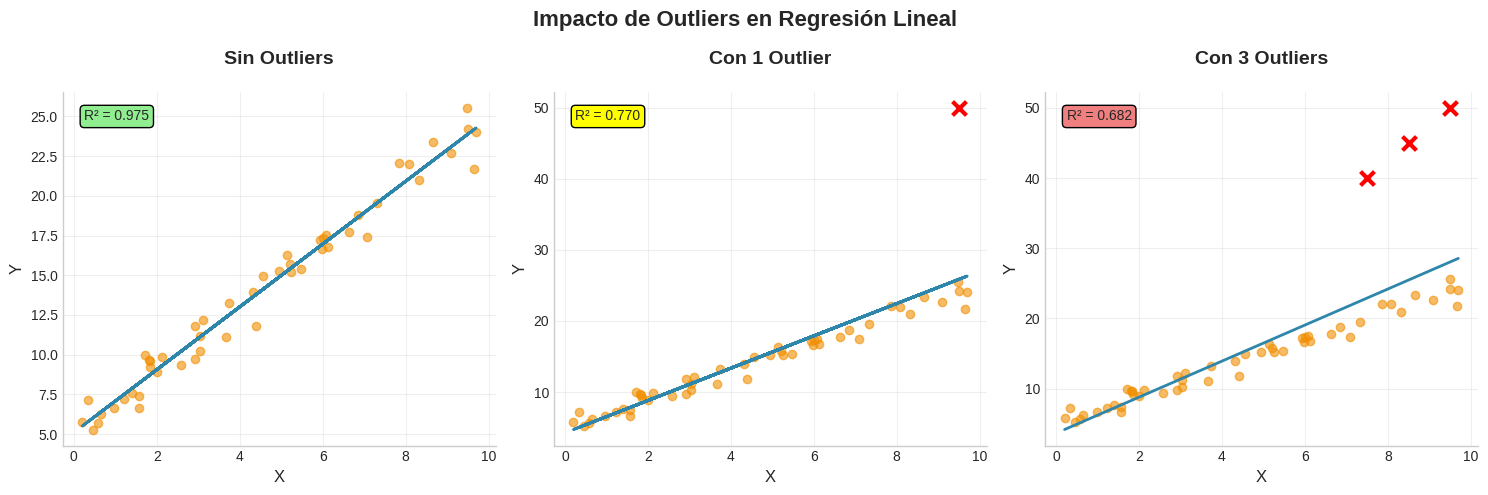

⚠️ Observaciones:
  • Los outliers pueden cambiar dramáticamente la línea de regresión
  • El R² disminuye significativamente con outliers
  • Considerar técnicas robustas (RANSAC, Huber) para datos con outliers


In [8]:
demonstrate_outlier_effect()

---

## 3. Regresión Lineal Múltiple

### 📖 Teoría: Múltiples Variables Predictoras

Cuando tenemos múltiples características, el modelo se extiende a:

$$y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$$

En forma matricial: $y = X\theta$


### 💻 Dataset Real: Predicción de Precios de Casas

In [ ]:
print_section("3.1 REGRESIÓN MÚLTIPLE - DATASET CALIFORNIA HOUSING")

# Cargar dataset de California Housing
from sklearn.datasets import fetch_california_housing

# Cargar datos
california = fetch_california_housing()
X_calif = pd.DataFrame(california.data, columns=california.feature_names)
y_calif = california.target

print("📊 Información del Dataset:")
print(f"  • Número de muestras: {X_calif.shape[0]:,}")
print(f"  • Número de características: {X_calif.shape[1]}")
print(f"  • Variable objetivo: Precio medio de casas (en cientos de miles de dólares)")
print("\n📋 Características disponibles:")
for i, col in enumerate(X_calif.columns, 1):
    print(f"  {i}. {col}")

# Estadísticas descriptivas
print("\n📈 Estadísticas Descriptivas:")
display(X_calif.describe())

# Visualizar distribuciones
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(X_calif.columns):
    axes[idx].hist(X_calif[col], bins=30, color=COLORS['accent'], 
                   alpha=0.7, edgecolor='black')
    axes[idx].set_title(col, fontweight='bold')
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].grid(True, alpha=0.3)

axes[8].hist(y_calif, bins=30, color=COLORS['success'], 
             alpha=0.7, edgecolor='black')
axes[8].set_title('Precio (Target)', fontweight='bold')
axes[8].set_ylabel('Frecuencia')
axes[8].grid(True, alpha=0.3)

plt.suptitle("Distribución de Variables - California Housing", 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### 📊 Análisis de Correlación

In [ ]:
print_section("3.2 ANÁLISIS DE CORRELACIÓN")

# Crear DataFrame completo
df_calif = X_calif.copy()
df_calif['Price'] = y_calif

# Matriz de correlación
correlation_matrix = df_calif.corr()

# Visualización de correlación
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True,
            linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[0])
axes[0].set_title('Matriz de Correlación', fontsize=14, fontweight='bold')

# Correlación con variable objetivo
target_corr = correlation_matrix['Price'].sort_values(ascending=False)[1:]
colors = [COLORS['success'] if x > 0 else COLORS['warning'] for x in target_corr]
bars = axes[1].barh(target_corr.index, target_corr.values, color=colors)
axes[1].set_xlabel('Correlación con Precio')
axes[1].set_title('Correlación de Features con Precio', fontsize=14, fontweight='bold')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.5)

# Añadir valores
for bar, value in zip(bars, target_corr.values):
    axes[1].text(value + 0.01 if value > 0 else value - 0.01, 
                bar.get_y() + bar.get_height()/2, 
                f'{value:.3f}', va='center', ha='left' if value > 0 else 'right')

plt.tight_layout()
plt.show()

print("🔍 Observaciones clave:")
print(f"  • Mayor correlación positiva: {target_corr.index[0]} ({target_corr.values[0]:.3f})")
print(f"  • Mayor correlación negativa: {target_corr.index[-1]} ({target_corr.values[-1]:.3f})")

### 🔧 Entrenamiento del Modelo Múltiple

In [ ]:
print_section("3.3 ENTRENAMIENTO Y EVALUACIÓN")

# Preparar datos
X_train, X_test, y_train, y_test = train_test_split(
    X_calif, y_calif, test_size=0.2, random_state=42
)

# Escalar características (importante para regresión múltiple)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo
model_multiple = LinearRegression()
model_multiple.fit(X_train_scaled, y_train)

# Predicciones
y_train_pred = model_multiple.predict(X_train_scaled)
y_test_pred = model_multiple.predict(X_test_scaled)

# Métricas
def evaluate_model(y_true, y_pred, dataset_name):
    """Calcular y mostrar métricas de evaluación"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n📊 Métricas para {dataset_name}:")
    print(f"  • MSE:  {mse:.4f}")
    print(f"  • RMSE: {rmse:.4f}")
    print(f"  • MAE:  {mae:.4f}")
    print(f"  • R²:   {r2:.4f}")
    
    return {'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2}

train_metrics = evaluate_model(y_train, y_train_pred, "Entrenamiento")
test_metrics = evaluate_model(y_test, y_test_pred, "Prueba")

# Visualización de predicciones
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de predicciones vs reales
for ax, y_true, y_pred, title, metrics in [
    (axes[0], y_train, y_train_pred, "Conjunto de Entrenamiento", train_metrics),
    (axes[1], y_test, y_test_pred, "Conjunto de Prueba", test_metrics)
]:
    ax.scatter(y_true, y_pred, alpha=0.5, s=20, color=COLORS['accent'])
    ax.plot([y_true.min(), y_true.max()], 
            [y_true.min(), y_true.max()], 
            'r--', linewidth=2, label='Predicción Perfecta')
    
    # Añadir banda de error
    error_band = 0.5  # ±0.5 para visualización
    ax.fill_between([y_true.min(), y_true.max()],
                    [y_true.min() - error_band, y_true.max() - error_band],
                    [y_true.min() + error_band, y_true.max() + error_band],
                    alpha=0.2, color='gray', label=f'±{error_band}')
    
    plot_style(ax, title, "Valor Real", "Valor Predicho")
    ax.legend()
    
    # Añadir métricas
    metrics_text = f"R² = {metrics['r2']:.3f}\nRMSE = {metrics['rmse']:.3f}"
    ax.text(0.05, 0.95, metrics_text, transform=ax.transAxes,
           verticalalignment='top',
           bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.suptitle("Evaluación del Modelo de Regresión Múltiple", 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### 📊 Importancia de Características

In [ ]:
print_section("3.4 IMPORTANCIA DE CARACTERÍSTICAS")

# Obtener coeficientes
feature_importance = pd.DataFrame({
    'Feature': X_calif.columns,
    'Coefficient': model_multiple.coef_,
    'Abs_Coefficient': np.abs(model_multiple.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("📊 Coeficientes del Modelo (ordenados por importancia absoluta):")
display(feature_importance)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Coeficientes
colors = [COLORS['success'] if x > 0 else COLORS['warning'] 
          for x in feature_importance['Coefficient']]
bars = axes[0].barh(feature_importance['Feature'], 
                   feature_importance['Coefficient'], 
                   color=colors)
axes[0].set_xlabel('Coeficiente')
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=1)
plot_style(axes[0], "Coeficientes del Modelo", "Valor del Coeficiente", "")

# Importancia absoluta
axes[1].barh(feature_importance['Feature'], 
            feature_importance['Abs_Coefficient'],
            color=COLORS['primary'])
axes[1].set_xlabel('|Coeficiente|')
plot_style(axes[1], "Importancia Absoluta", "Magnitud", "")

plt.suptitle("Análisis de Importancia de Características", 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 Interpretación:")
print(f"  • Característica más importante: {feature_importance.iloc[0]['Feature']}")
print(f"    Un aumento de 1 std en {feature_importance.iloc[0]['Feature']} ")
print(f"    cambia el precio en {feature_importance.iloc[0]['Coefficient']:.3f} unidades")

---

## 4. Gradient Descent desde Cero

### 📖 Teoría: Optimización Iterativa

El Gradient Descent encuentra los parámetros óptimos minimizando iterativamente la función de costo:

$$\theta_{t+1} = \theta_t - \alpha \nabla J(\theta_t)$$

### 💻 Implementación Manual

### Gráfica en 3D de nuestra función de coste

In [ ]:
from matplotlib import cm # Para manejar colores

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

def f(x,y):
  return x**2 + y**2;

res = 100

X = np.linspace(-4, 4, res)
Y = np.linspace(-4, 4, res)

X, Y = np.meshgrid(X, Y)

Z = f(X,Y) 

# Gráficar la superficie
surf = ax.plot_surface(X, Y, Z, cmap=cm.cool,
                       linewidth=0, antialiased=False)

fig.colorbar(surf)

In [ ]:
level_map = np.linspace(np.min(Z), np.max(Z),res) 
plt.contourf(X, Y, Z, levels=level_map,cmap=cm.cool)
plt.colorbar()
plt.title('Descenso del gradiente')

def derivate(_p,p):
  return  (f(_p[0],_p[1]) - f(p[0],p[1])) / h

p = np.random.rand(2) * 8 - 4 # generar dos valores aleatorios

plt.plot(p[0],p[1],'o', c='k')

lr = 0.01
h = 0.01

grad = np.zeros(2)

for i in range(10000):
  for idx, val in enumerate(p): 
    _p = np.copy(p)

    _p[idx] = _p[idx] + h;

    dp = derivate(_p,p) 

    grad[idx] = dp

  p = p - lr * grad

  if(i % 10 == 0):
    plt.plot(p[0],p[1],'o', c='r')

plt.plot(p[0],p[1],'o', c='w')
plt.show()

print("El punto mínimo se encuentra en: ", p)

In [ ]:
print_section("4.1 GRADIENT DESCENT - IMPLEMENTACIÓN DESDE CERO")

class GradientDescentRegression:
    """
    Implementación de Regresión Lineal usando Gradient Descent
    """
    
    def __init__(self, learning_rate=0.01, n_iterations=1000, verbose=False):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.verbose = verbose
        self.theta = None
        self.cost_history = []
        
    def _add_intercept(self, X):
        """Agregar columna de unos para el intercepto"""
        intercept = np.ones((X.shape[0], 1))
        return np.c_[intercept, X]
    
    def _compute_cost(self, X, y, theta):
        """Calcular función de costo MSE"""
        m = len(y)
        predictions = X.dot(theta)
        cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
        return cost
    
    def _gradient_descent(self, X, y):
        """Algoritmo de gradient descent"""
        m = len(y)
        
        for i in range(self.n_iterations):
            # Predicciones actuales
            predictions = X.dot(self.theta)
            
            # Calcular errores
            errors = predictions - y
            
            # Calcular gradientes
            gradients = (1 / m) * X.T.dot(errors)
            
            # Actualizar parámetros
            self.theta = self.theta - self.learning_rate * gradients
            
            # Guardar costo
            cost = self._compute_cost(X, y, self.theta)
            self.cost_history.append(cost)
            
            # Imprimir progreso
            if self.verbose and i % 100 == 0:
                print(f"  Iteración {i}: Costo = {cost:.6f}")
    
    def fit(self, X, y):
        """Entrenar el modelo"""
        # Preparar datos
        X = np.array(X)
        y = np.array(y).reshape(-1, 1)
        X = self._add_intercept(X)
        
        # Inicializar parámetros
        self.theta = np.zeros((X.shape[1], 1))
        
        # Ejecutar gradient descent
        self._gradient_descent(X, y)
        
        return self
    
    def predict(self, X):
        """Realizar predicciones"""
        X = np.array(X)
        X = self._add_intercept(X)
        return X.dot(self.theta).flatten()
    
    def plot_convergence(self):
        """Visualizar convergencia del algoritmo"""
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Convergencia completa
        axes[0].plot(self.cost_history, color=COLORS['primary'], linewidth=2)
        axes[0].set_xlabel('Iteración')
        axes[0].set_ylabel('Costo J(θ)')
        plot_style(axes[0], "Convergencia del Gradient Descent", 
                  "Iteración", "Costo")
        
        # Primeras 100 iteraciones
        axes[1].plot(self.cost_history[:100], color=COLORS['accent'], linewidth=2)
        axes[1].set_xlabel('Iteración')
        axes[1].set_ylabel('Costo J(θ)')
        plot_style(axes[1], "Primeras 100 Iteraciones", 
                  "Iteración", "Costo")
        
        plt.tight_layout()
        plt.show()


In [ ]:
# Demostración con datos sintéticos
print("🎯 Entrenando modelo con Gradient Descent...")
np.random.seed(42)
X_gd = np.random.randn(100, 3)  # 3 características
true_theta = np.array([2, -1, 0.5, 3])  # Incluye intercepto
y_gd = X_gd.dot(true_theta[1:]) + true_theta[0] + np.random.randn(100) * 0.5

# Entrenar
gd_model = GradientDescentRegression(learning_rate=0.1, 
                                     n_iterations=500, 
                                     verbose=True)
gd_model.fit(X_gd, y_gd)

print(f"\n✅ Parámetros verdaderos: {true_theta}")
print(f"✅ Parámetros encontrados: {gd_model.theta.flatten()}")

# Visualizar convergencia
gd_model.plot_convergence()

### 🔬 Experimento: Efecto del Learning Rate

In [ ]:
print_section("4.2 EXPERIMENTO: EFECTO DEL LEARNING RATE")

def experiment_learning_rates():
    """Comparar diferentes learning rates"""
    
    learning_rates = [0.001, 0.01, 0.1, 0.5]
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.ravel()
    
    for idx, lr in enumerate(learning_rates):
        # Entrenar modelo
        model = GradientDescentRegression(learning_rate=lr, 
                                         n_iterations=200, 
                                         verbose=False)
        model.fit(X_gd, y_gd)
        
        # Visualizar
        ax = axes[idx]
        ax.plot(model.cost_history, linewidth=2, 
               color=COLORS['accent'] if lr <= 0.1 else COLORS['warning'])
        ax.set_xlabel('Iteración')
        ax.set_ylabel('Costo J(θ)')
        ax.set_title(f'Learning Rate = {lr}', fontweight='bold')
        ax.grid(True, alpha=0.3)
        
        # Añadir información
        if lr <= 0.1:
            final_cost = model.cost_history[-1]
            ax.text(0.6, 0.8, f'Converge a {final_cost:.4f}',
                   transform=ax.transAxes,
                   bbox=dict(boxstyle='round', facecolor='lightgreen'))
        else:
            ax.text(0.6, 0.8, 'Diverge o oscila',
                   transform=ax.transAxes,
                   bbox=dict(boxstyle='round', facecolor='lightcoral'))
    
    plt.suptitle("Impacto del Learning Rate en la Convergencia", 
                fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print("💡 Observaciones:")
    print("  • α muy pequeño (0.001): Convergencia muy lenta")
    print("  • α óptimo (0.01-0.1): Convergencia rápida y estable")
    print("  • α muy grande (>0.5): Divergencia o oscilación")

In [ ]:
experiment_learning_rates()

---

## 6. Regularización

### 📖 Teoría: Control de Complejidad

La regularización añade una penalización al costo para evitar overfitting:

- **Ridge (L2)**: $J = MSE + \lambda \sum \theta_i^2$
- **LASSO (L1)**: $J = MSE + \lambda \sum |\theta_i|$
- **Elastic Net**: Combina L1 y L2

### 💻 Comparación de Técnicas de Regularización

In [ ]:
print_section("6.1 COMPARACIÓN DE REGULARIZACIÓN")

def compare_regularization():
    """Comparar Ridge, LASSO y Elastic Net"""
    
    # Crear dataset con multicolinealidad
    np.random.seed(42)
    n_samples, n_features = 100, 20
    X_reg = np.random.randn(n_samples, n_features)
    
    # Añadir correlación entre features
    X_reg[:, 1] = X_reg[:, 0] + np.random.randn(n_samples) * 0.1
    X_reg[:, 2] = X_reg[:, 0] + np.random.randn(n_samples) * 0.1
    
    # Generar y con solo algunas features relevantes
    true_coef = np.zeros(n_features)
    true_coef[0:5] = [3, 2, -1.5, 0, -2]  # Solo 5 features relevantes
    y_reg = X_reg @ true_coef + np.random.randn(n_samples) * 0.5
    
    # Split datos
    X_train, X_test, y_train, y_test = train_test_split(
        X_reg, y_reg, test_size=0.3, random_state=42
    )
    
    # Escalar
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Modelos
    models = {
        'Linear': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'LASSO': Lasso(alpha=0.1),
        'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5)
    }
    
    results = {}
    coefficients = {}
    
    # Entrenar modelos
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        
        results[name] = {
            'train_score': model.score(X_train_scaled, y_train),
            'test_score': model.score(X_test_scaled, y_test),
            'mse': mean_squared_error(y_test, y_pred),
            'n_zero_coef': np.sum(np.abs(model.coef_) < 0.01)
        }
        coefficients[name] = model.coef_
    
    # Visualizar resultados
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # 1. Comparación de scores
    models_names = list(results.keys())
    train_scores = [results[m]['train_score'] for m in models_names]
    test_scores = [results[m]['test_score'] for m in models_names]
    
    x = np.arange(len(models_names))
    width = 0.35
    
    axes[0, 0].bar(x - width/2, train_scores, width, 
                   label='Train', color=COLORS['primary'])
    axes[0, 0].bar(x + width/2, test_scores, width, 
                   label='Test', color=COLORS['accent'])
    axes[0, 0].set_xticks(x)
    axes[0, 0].set_xticklabels(models_names)
    axes[0, 0].set_ylim([0, 1])
    plot_style(axes[0, 0], "Comparación de R² Score", "", "R²")
    axes[0, 0].legend()
    
    # 2. Coeficientes
    for name, coef in coefficients.items():
        axes[0, 1].plot(coef, 'o-', label=name, alpha=0.7, markersize=4)
    axes[0, 1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    plot_style(axes[0, 1], "Valores de Coeficientes", "Feature", "Coeficiente")
    axes[0, 1].legend()
    
    # 3. Número de coeficientes cero
    zero_counts = [results[m]['n_zero_coef'] for m in models_names]
    axes[1, 0].bar(models_names, zero_counts, color=COLORS['warning'])
    plot_style(axes[1, 0], "Coeficientes ≈ 0 (Sparsity)", 
              "Modelo", "Número de Coef ≈ 0")
    
    # Añadir valores
    for i, (name, count) in enumerate(zip(models_names, zero_counts)):
        axes[1, 0].text(i, count + 0.5, str(count), ha='center')
    
    # 4. MSE Comparison
    mse_values = [results[m]['mse'] for m in models_names]
    axes[1, 1].bar(models_names, mse_values, color=COLORS['secondary'])
    plot_style(axes[1, 1], "Mean Squared Error", "Modelo", "MSE")
    
    plt.suptitle("Comparación de Técnicas de Regularización", 
                fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Tabla de resultados
    print("\n📊 Tabla de Resultados:")
    results_df = pd.DataFrame(results).T
    display(results_df)
    
    print("\n💡 Observaciones:")
    print("  • Linear: Puede overfittear con muchas features")
    print("  • Ridge: Reduce magnitud pero mantiene todas las features")
    print("  • LASSO: Selecciona features (pone algunas en 0)")
    print("  • ElasticNet: Balance entre Ridge y LASSO")



In [ ]:
compare_regularization()

---

## 7. Regresión Logística

### 📖 Teoría: De Regresión a Clasificación

La regresión logística usa la función sigmoide para convertir valores reales en probabilidades:

$$P(y=1|x) = \sigma(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}$$

### 💻 Implementación desde Cero

In [ ]:
print_section("7.1 REGRESIÓN LOGÍSTICA - IMPLEMENTACIÓN MANUAL")

class LogisticRegressionManual:
    """
    Implementación de Regresión Logística usando Gradient Descent
    """
    
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.theta = None
        self.cost_history = []
        
    def _sigmoid(self, z):
        """Función sigmoide"""
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))  # Clip para estabilidad
    
    def _add_intercept(self, X):
        """Agregar columna de unos"""
        intercept = np.ones((X.shape[0], 1))
        return np.c_[intercept, X]
    
    def _cost_function(self, X, y, theta):
        """Función de costo (cross-entropy)"""
        m = len(y)
        z = X.dot(theta)
        predictions = self._sigmoid(z)
        
        # Evitar log(0)
        epsilon = 1e-7
        predictions = np.clip(predictions, epsilon, 1 - epsilon)
        
        cost = -(1/m) * np.sum(y * np.log(predictions) + 
                               (1 - y) * np.log(1 - predictions))
        return cost
    
    def fit(self, X, y):
        """Entrenar el modelo"""
        X = self._add_intercept(X)
        m, n = X.shape
        
        # Inicializar parámetros
        self.theta = np.zeros(n)
        
        # Gradient Descent
        for i in range(self.n_iterations):
            # Predicciones
            z = X.dot(self.theta)
            predictions = self._sigmoid(z)
            
            # Gradientes
            gradients = (1/m) * X.T.dot(predictions - y)
            
            # Actualizar parámetros
            self.theta -= self.learning_rate * gradients
            
            # Guardar costo
            cost = self._cost_function(X, y, self.theta)
            self.cost_history.append(cost)
    
    def predict_proba(self, X):
        """Predecir probabilidades"""
        X = self._add_intercept(X)
        return self._sigmoid(X.dot(self.theta))
    
    def predict(self, X, threshold=0.5):
        """Predecir clases"""
        return (self.predict_proba(X) >= threshold).astype(int)
    
    def plot_decision_boundary(self, X, y):
        """Visualizar frontera de decisión (2D)"""
        if X.shape[1] != 2:
            print("⚠️ Solo se puede visualizar para 2 features")
            return
        
        fig, ax = plt.subplots(figsize=(10, 8))
        
        # Plot puntos
        colors = ['blue' if yi == 0 else 'red' for yi in y]
        ax.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.6, 
                  edgecolors='black', linewidth=0.5)
        
        # Crear mesh para frontera
        h = 0.02
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
        
        # Predicciones en mesh
        Z = self.predict_proba(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Contorno
        ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu', levels=[0, 0.5, 1])
        ax.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
        
        plot_style(ax, "Frontera de Decisión - Regresión Logística", 
                  "Feature 1", "Feature 2")
        
        # Leyenda
        from matplotlib.patches import Patch
        legend_elements = [
            Patch(facecolor='blue', alpha=0.6, label='Clase 0'),
            Patch(facecolor='red', alpha=0.6, label='Clase 1')
        ]
        ax.legend(handles=legend_elements)
        
        plt.show()

In [ ]:
# Demostración con datos sintéticos
print("🎯 Generando dataset de clasificación binaria...")
np.random.seed(42)

# Generar dos clases separables
n_samples = 200
X_class1 = np.random.randn(n_samples//2, 2) + np.array([2, 2])
X_class2 = np.random.randn(n_samples//2, 2) + np.array([-2, -2])
X_log = np.vstack([X_class1, X_class2])
y_log = np.hstack([np.zeros(n_samples//2), np.ones(n_samples//2)])

# Entrenar modelo
log_model = LogisticRegressionManual(learning_rate=0.1, n_iterations=500)
log_model.fit(X_log, y_log)

print(f"✅ Modelo entrenado")
print(f"   Parámetros: θ₀={log_model.theta[0]:.3f}, θ₁={log_model.theta[1]:.3f}, θ₂={log_model.theta[2]:.3f}")

# Evaluar
y_pred = log_model.predict(X_log)
accuracy = np.mean(y_pred == y_log)
print(f"   Accuracy: {accuracy:.2%}")

# Visualizar frontera
log_model.plot_decision_boundary(X_log, y_log)

# Convergencia
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(log_model.cost_history, color=COLORS['primary'], linewidth=2)
plot_style(ax, "Convergencia de Regresión Logística", "Iteración", "Costo (Cross-Entropy)")
plt.show()

### 🔬 Función Sigmoide y Odds

In [ ]:
print_section("7.2 EXPLORANDO LA FUNCIÓN SIGMOIDE")

def explore_sigmoid():
    """Visualización interactiva de la función sigmoide"""
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # 1. Función sigmoide básica
    z = np.linspace(-10, 10, 1000)
    sigmoid = 1 / (1 + np.exp(-z))
    
    axes[0, 0].plot(z, sigmoid, color=COLORS['primary'], linewidth=3)
    axes[0, 0].axhline(y=0.5, color='red', linestyle='--', alpha=0.5)
    axes[0, 0].axvline(x=0, color='red', linestyle='--', alpha=0.5)
    axes[0, 0].fill_between(z[z <= 0], 0, sigmoid[z <= 0], 
                           alpha=0.3, color=COLORS['primary'], label='P < 0.5')
    axes[0, 0].fill_between(z[z >= 0], sigmoid[z >= 0], 1, 
                           alpha=0.3, color=COLORS['accent'], label='P > 0.5')
    plot_style(axes[0, 0], "Función Sigmoide", "z = θᵀx", "P(y=1)")
    axes[0, 0].legend()
    
    # 2. Derivada de la sigmoide
    sigmoid_derivative = sigmoid * (1 - sigmoid)
    axes[0, 1].plot(z, sigmoid_derivative, color=COLORS['secondary'], linewidth=3)
    axes[0, 1].fill_between(z, 0, sigmoid_derivative, alpha=0.3, color=COLORS['secondary'])
    plot_style(axes[0, 1], "Derivada de Sigmoide", "z", "σ'(z) = σ(z)(1-σ(z))")
    axes[0, 1].text(0, 0.22, 'Máximo en z=0\nσ\'(0) = 0.25', ha='center',
                   bbox=dict(boxstyle='round', facecolor='yellow'))
    
    # 3. Log-Odds (Logit)
    p = np.linspace(0.01, 0.99, 100)
    log_odds = np.log(p / (1 - p))
    
    axes[1, 0].plot(p, log_odds, color=COLORS['warning'], linewidth=3)
    axes[1, 0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    axes[1, 0].axvline(x=0.5, color='red', linestyle='--', alpha=0.5)
    plot_style(axes[1, 0], "Log-Odds (Logit)", "Probabilidad", "log(p/(1-p))")
    axes[1, 0].set_ylim([-5, 5])
    
    # 4. Comparación de diferentes pendientes
    z_comp = np.linspace(-5, 5, 100)
    for beta in [0.5, 1, 2, 4]:
        sigmoid_beta = 1 / (1 + np.exp(-beta * z_comp))
        axes[1, 1].plot(z_comp, sigmoid_beta, linewidth=2, label=f'β={beta}')
    
    axes[1, 1].axhline(y=0.5, color='black', linestyle='--', alpha=0.3)
    axes[1, 1].axvline(x=0, color='black', linestyle='--', alpha=0.3)
    plot_style(axes[1, 1], "Efecto de la Pendiente", "z", "P(y=1)")
    axes[1, 1].legend()
    
    plt.suptitle("Explorando la Función Sigmoide", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print("💡 Observaciones clave:")
    print("  • La sigmoide mapea (-∞, +∞) → (0, 1)")
    print("  • Derivada máxima en z=0 (punto de mayor incertidumbre)")
    print("  • Mayor pendiente β → transición más abrupta")
    print("  • Log-odds son lineales en las características")

In [ ]:
explore_sigmoid()

---

## 8. Métricas de Clasificación

### 📖 Teoría: Evaluando Clasificadores

Métricas clave:
- **Accuracy**: % de predicciones correctas
- **Precision**: De los que predije positivo, ¿cuántos lo eran?
- **Recall**: De los positivos reales, ¿cuántos detecté?
- **F1-Score**: Media armónica de precision y recall
- **AUC-ROC**: Área bajo la curva ROC

### 💻 Análisis Completo de Métricas

In [ ]:
print_section("8.1 MÉTRICAS DE CLASIFICACIÓN - DATASET REAL")

# Cargar dataset de cáncer de mama
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

print("📊 Dataset de Cáncer de Mama:")
print(f"  • Muestras: {X_cancer.shape[0]}")
print(f"  • Features: {X_cancer.shape[1]}")
print(f"  • Clases: {cancer.target_names}")
print(f"  • Balance: {np.bincount(y_cancer)}")



In [ ]:
# Split y escalar
X_train, X_test, y_train, y_test = train_test_split(
    X_cancer, y_cancer, test_size=0.3, random_state=42, stratify=y_cancer
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predicciones
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

In [ ]:
def plot_classification_metrics(y_true, y_pred, y_proba):
    """Visualización completa de métricas de clasificación"""
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    # 1. Matriz de Confusión
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                cbar=False, ax=axes[0, 0])
    axes[0, 0].set_xlabel('Predicho')
    axes[0, 0].set_ylabel('Real')
    axes[0, 0].set_title('Matriz de Confusión', fontweight='bold')
    
    # Añadir métricas
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    axes[0, 0].text(2.5, 1, f'Sens: {sensitivity:.2%}\nSpec: {specificity:.2%}',
                   bbox=dict(boxstyle='round', facecolor='yellow'))
    
    # 2. Curva ROC
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    
    axes[0, 1].plot(fpr, tpr, color=COLORS['primary'], linewidth=2,
                   label=f'ROC (AUC = {roc_auc:.3f})')
    axes[0, 1].plot([0, 1], [0, 1], 'k--', linewidth=1)
    axes[0, 1].fill_between(fpr, tpr, alpha=0.3, color=COLORS['primary'])
    axes[0, 1].set_xlabel('False Positive Rate')
    axes[0, 1].set_ylabel('True Positive Rate')
    axes[0, 1].set_title('Curva ROC', fontweight='bold')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Precision-Recall Curve
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    avg_precision = average_precision_score(y_true, y_proba)
    
    axes[0, 2].plot(recall, precision, color=COLORS['accent'], linewidth=2,
                   label=f'AP = {avg_precision:.3f}')
    axes[0, 2].fill_between(recall, precision, alpha=0.3, color=COLORS['accent'])
    axes[0, 2].set_xlabel('Recall')
    axes[0, 2].set_ylabel('Precision')
    axes[0, 2].set_title('Curva Precision-Recall', fontweight='bold')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)
    
    # 4. Distribución de Probabilidades
    axes[1, 0].hist(y_proba[y_true == 0], bins=30, alpha=0.7, 
                   color=COLORS['primary'], label='Clase 0', density=True)
    axes[1, 0].hist(y_proba[y_true == 1], bins=30, alpha=0.7, 
                   color=COLORS['warning'], label='Clase 1', density=True)
    axes[1, 0].axvline(x=0.5, color='black', linestyle='--', linewidth=2)
    axes[1, 0].set_xlabel('Probabilidad Predicha')
    axes[1, 0].set_ylabel('Densidad')
    axes[1, 0].set_title('Distribución de Probabilidades', fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # 5. Métricas por Umbral
    thresholds_plot = np.linspace(0.1, 0.9, 50)
    precisions = []
    recalls = []
    f1s = []
    
    for thresh in thresholds_plot:
        y_pred_thresh = (y_proba >= thresh).astype(int)
        if len(np.unique(y_pred_thresh)) > 1:  # Evitar warnings
            prec = precision_score(y_true, y_pred_thresh, zero_division=0)
            rec = recall_score(y_true, y_pred_thresh)
            f1 = f1_score(y_true, y_pred_thresh)
        else:
            prec = rec = f1 = 0
        
        precisions.append(prec)
        recalls.append(rec)
        f1s.append(f1)
    
    axes[1, 1].plot(thresholds_plot, precisions, label='Precision', linewidth=2)
    axes[1, 1].plot(thresholds_plot, recalls, label='Recall', linewidth=2)
    axes[1, 1].plot(thresholds_plot, f1s, label='F1-Score', linewidth=2)
    axes[1, 1].axvline(x=0.5, color='black', linestyle='--', alpha=0.5)
    axes[1, 1].set_xlabel('Umbral')
    axes[1, 1].set_ylabel('Score')
    axes[1, 1].set_title('Métricas vs Umbral', fontweight='bold')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    # 6. Classification Report
    from sklearn.metrics import classification_report
    report = classification_report(y_true, y_pred, output_dict=True)
    
    # Crear tabla
    metrics_data = []
    for label in ['0', '1']:
        metrics_data.append([
            f"Clase {label}",
            f"{report[label]['precision']:.3f}",
            f"{report[label]['recall']:.3f}",
            f"{report[label]['f1-score']:.3f}",
            f"{report[label]['support']:.0f}"
        ])
    metrics_data.append([
        "Weighted Avg",
        f"{report['weighted avg']['precision']:.3f}",
        f"{report['weighted avg']['recall']:.3f}",
        f"{report['weighted avg']['f1-score']:.3f}",
        f"{report['weighted avg']['support']:.0f}"
    ])
    
    # Mostrar tabla
    axes[1, 2].axis('tight')
    axes[1, 2].axis('off')
    table = axes[1, 2].table(cellText=metrics_data,
                            colLabels=['Clase', 'Precision', 'Recall', 'F1', 'Support'],
                            cellLoc='center',
                            loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5)
    axes[1, 2].set_title('Classification Report', fontweight='bold', pad=20)
    
    plt.suptitle("Análisis Completo de Métricas de Clasificación", 
                fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Imprimir métricas adicionales
    print("\n📊 Métricas Globales:")
    print(f"  • Accuracy: {accuracy_score(y_true, y_pred):.3f}")
    print(f"  • AUC-ROC: {roc_auc:.3f}")
    print(f"  • Average Precision: {avg_precision:.3f}")

In [ ]:
plot_classification_metrics(y_test, y_pred, y_proba)

---

## 9. Casos Prácticos Reales

### 📊 Caso 1: Predicción de Diabetes

In [ ]:
print_section("9.1 CASO PRÁCTICO: PREDICCIÓN DE DIABETES")

# Cargar dataset de diabetes
diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

print("📊 Dataset de Diabetes:")
print(f"  • Muestras: {X_diabetes.shape[0]}")
print(f"  • Features: {X_diabetes.shape[1]}")
print(f"  • Variable objetivo: Progresión de diabetes (continua)")

# Información de features
feature_names = ['age', 'sex', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']
print("\n📋 Features (todas normalizadas):")
for i, name in enumerate(feature_names):
    print(f"  {i+1}. {name}")

# Pipeline completo
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Crear pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())
])

# Grid search para hyperparámetros
param_grid = {
    'model__alpha': np.logspace(-3, 3, 20)
}

# Cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, 
                          scoring='neg_mean_squared_error',
                          n_jobs=-1)

# Split datos
X_train_diab, X_test_diab, y_train_diab, y_test_diab = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42
)

# Entrenar
print("\n🔍 Realizando Grid Search con Cross-Validation...")
grid_search.fit(X_train_diab, y_train_diab)

print(f"\n✅ Mejores hiperparámetros: {grid_search.best_params_}")
print(f"✅ Mejor score CV: {-grid_search.best_score_:.2f}")

# Evaluar en test
y_pred_diab = grid_search.predict(X_test_diab)
test_mse = mean_squared_error(y_test_diab, y_pred_diab)
test_r2 = r2_score(y_test_diab, y_pred_diab)

print(f"\n📊 Resultados en Test:")
print(f"  • MSE: {test_mse:.2f}")
print(f"  • RMSE: {np.sqrt(test_mse):.2f}")
print(f"  • R²: {test_r2:.3f}")

# Visualización
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# CV scores
cv_results = pd.DataFrame(grid_search.cv_results_)
axes[0].plot(cv_results['param_model__alpha'], 
            -cv_results['mean_test_score'], 
            'o-', color=COLORS['primary'])
axes[0].fill_between(cv_results['param_model__alpha'],
                     -cv_results['mean_test_score'] - cv_results['std_test_score'],
                     -cv_results['mean_test_score'] + cv_results['std_test_score'],
                     alpha=0.3)
axes[0].set_xscale('log')
axes[0].set_xlabel('α (Regularización)')
axes[0].set_ylabel('MSE')
axes[0].axvline(x=grid_search.best_params_['model__alpha'], 
               color='red', linestyle='--')
plot_style(axes[0], "Cross-Validation Scores", "α", "MSE")

# Predicciones
axes[1].scatter(y_test_diab, y_pred_diab, alpha=0.6, 
               color=COLORS['accent'], edgecolors='black', linewidth=0.5)
axes[1].plot([y_test_diab.min(), y_test_diab.max()],
            [y_test_diab.min(), y_test_diab.max()],
            'r--', linewidth=2)
plot_style(axes[1], "Predicciones en Test", "Real", "Predicción")

# Feature importance
best_model = grid_search.best_estimator_['model']
importance = np.abs(best_model.coef_)
sorted_idx = np.argsort(importance)[::-1]

axes[2].barh(range(len(feature_names)), importance[sorted_idx], 
            color=COLORS['secondary'])
axes[2].set_yticks(range(len(feature_names)))
axes[2].set_yticklabels([feature_names[i] for i in sorted_idx])
plot_style(axes[2], "Importancia de Features", "|Coeficiente|", "")

plt.suptitle("Predicción de Progresión de Diabetes", 
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### 🏠 Caso 2: Sistema Completo de Predicción de Precios

In [ ]:
print_section("9.2 SISTEMA COMPLETO: PREDICCIÓN DE PRECIOS INMOBILIARIOS")

class RealEstatePricePredictor:
    """
    Sistema completo de predicción de precios con:
    - Preprocesamiento automático
    - Selección de features
    - Multiple models
    - Interpretabilidad
    """
    
    def __init__(self):
        self.scaler = StandardScaler()
        self.models = {}
        self.best_model = None
        self.feature_names = None
        self.results = {}
        
    def preprocess(self, X, y=None, fit=True):
        """Preprocesamiento de datos"""
        if fit:
            X_scaled = self.scaler.fit_transform(X)
        else:
            X_scaled = self.scaler.transform(X)
        return X_scaled
    
    def train_multiple_models(self, X_train, y_train, X_val, y_val):
        """Entrenar y comparar múltiples modelos"""
        
        models_to_try = {
            'Linear': LinearRegression(),
            'Ridge': RidgeCV(alphas=np.logspace(-3, 3, 10)),
            'Lasso': LassoCV(alphas=np.logspace(-3, 1, 10), max_iter=1000),
            'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
            'Polynomial': Pipeline([
                ('poly', PolynomialFeatures(degree=2, include_bias=False)),
                ('linear', Ridge(alpha=1))
            ])
        }
        
        for name, model in models_to_try.items():
            # Entrenar
            model.fit(X_train, y_train)
            
            # Predicciones
            y_train_pred = model.predict(X_train)
            y_val_pred = model.predict(X_val)
            
            # Métricas
            self.results[name] = {
                'model': model,
                'train_r2': r2_score(y_train, y_train_pred),
                'val_r2': r2_score(y_val, y_val_pred),
                'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
                'val_rmse': np.sqrt(mean_squared_error(y_val, y_val_pred))
            }
            
        # Seleccionar mejor modelo
        best_name = max(self.results.keys(), 
                       key=lambda k: self.results[k]['val_r2'])
        self.best_model = self.results[best_name]['model']
        
        return self.results
    
    def plot_results(self):
        """Visualizar comparación de modelos"""
        
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        
        # Preparar datos
        model_names = list(self.results.keys())
        train_r2 = [self.results[m]['train_r2'] for m in model_names]
        val_r2 = [self.results[m]['val_r2'] for m in model_names]
        train_rmse = [self.results[m]['train_rmse'] for m in model_names]
        val_rmse = [self.results[m]['val_rmse'] for m in model_names]
        
        # R² Comparison
        x = np.arange(len(model_names))
        width = 0.35
        
        axes[0, 0].bar(x - width/2, train_r2, width, label='Train', 
                      color=COLORS['primary'])
        axes[0, 0].bar(x + width/2, val_r2, width, label='Validation', 
                      color=COLORS['accent'])
        axes[0, 0].set_xticks(x)
        axes[0, 0].set_xticklabels(model_names, rotation=45)
        axes[0, 0].set_ylim([0, 1])
        plot_style(axes[0, 0], "R² Score Comparison", "", "R²")
        axes[0, 0].legend()
        
        # RMSE Comparison
        axes[0, 1].bar(x - width/2, train_rmse, width, label='Train', 
                      color=COLORS['primary'])
        axes[0, 1].bar(x + width/2, val_rmse, width, label='Validation', 
                      color=COLORS['accent'])
        axes[0, 1].set_xticks(x)
        axes[0, 1].set_xticklabels(model_names, rotation=45)
        plot_style(axes[0, 1], "RMSE Comparison", "", "RMSE")
        axes[0, 1].legend()
        
        # Overfitting analysis
        overfitting = np.array(train_r2) - np.array(val_r2)
        colors = [COLORS['success'] if o < 0.1 else COLORS['warning'] 
                 if o < 0.2 else COLORS['warning'] for o in overfitting]
        axes[1, 0].bar(model_names, overfitting, color=colors)
        axes[1, 0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
        axes[1, 0].set_xticklabels(model_names, rotation=45)
        plot_style(axes[1, 0], "Overfitting Analysis", "", "Train R² - Val R²")
        
        # Summary table
        axes[1, 1].axis('tight')
        axes[1, 1].axis('off')
        
        table_data = []
        for name in model_names:
            table_data.append([
                name,
                f"{self.results[name]['train_r2']:.3f}",
                f"{self.results[name]['val_r2']:.3f}",
                f"{self.results[name]['val_rmse']:.1f}"
            ])
        
        table = axes[1, 1].table(cellText=table_data,
                                colLabels=['Modelo', 'Train R²', 'Val R²', 'Val RMSE'],
                                cellLoc='center',
                                loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(11)
        table.scale(1.2, 2)
        
        # Highlight best model
        best_idx = val_r2.index(max(val_r2))
        for j in range(4):
            table[(best_idx + 1, j)].set_facecolor('#90EE90')
        
        plt.suptitle("Comparación de Modelos de Regresión", 
                    fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

# Aplicar sistema
print("🏗️ Creando sistema de predicción de precios...")

# Usar California Housing
X_train_cal, X_test_cal, y_train_cal, y_test_cal = train_test_split(
    X_calif, y_calif, test_size=0.2, random_state=42
)

# Crear validación set
X_train_final, X_val_cal, y_train_final, y_val_cal = train_test_split(
    X_train_cal, y_train_cal, test_size=0.2, random_state=42
)

# Inicializar sistema
predictor = RealEstatePricePredictor()
predictor.feature_names = X_calif.columns

# Preprocesar
X_train_proc = predictor.preprocess(X_train_final)
X_val_proc = predictor.preprocess(X_val_cal, fit=False)

# Entrenar modelos
print("🎯 Entrenando múltiples modelos...")
results = predictor.train_multiple_models(X_train_proc, y_train_final,
                                         X_val_proc, y_val_cal)

# Visualizar
predictor.plot_results()

# Mejor modelo
best_model_name = max(results.keys(), key=lambda k: results[k]['val_r2'])
print(f"\n🏆 Mejor modelo: {best_model_name}")
print(f"   Val R²: {results[best_model_name]['val_r2']:.3f}")
print(f"   Val RMSE: {results[best_model_name]['val_rmse']:.3f}")

---

## 10. Proyecto Final Integrador

### 🎯 Proyecto: Sistema de Scoring de Crédito

In [ ]:
print_section("10. PROYECTO FINAL: SISTEMA DE SCORING DE CRÉDITO")

print("""
📋 DESCRIPCIÓN DEL PROYECTO:
Construir un sistema completo de scoring crediticio que:
1. Prediga la probabilidad de default de un cliente
2. Asigne un score de crédito (300-850)
3. Determine el límite de crédito apropiado
4. Proporcione explicaciones interpretables
""")

# Generar dataset sintético de crédito
np.random.seed(42)
n_samples = 5000

# Features
credit_data = pd.DataFrame({
    'age': np.random.normal(40, 15, n_samples).clip(18, 80),
    'income': np.random.lognormal(10.5, 0.8, n_samples),
    'employment_years': np.random.exponential(5, n_samples).clip(0, 40),
    'debt_to_income': np.random.beta(2, 5, n_samples),
    'credit_inquiries': np.random.poisson(2, n_samples),
    'credit_accounts': np.random.poisson(5, n_samples) + 1,
    'missed_payments': np.random.poisson(0.5, n_samples),
    'credit_utilization': np.random.beta(2, 3, n_samples),
    'bankruptcy': np.random.binomial(1, 0.05, n_samples),
    'home_owner': np.random.binomial(1, 0.6, n_samples)
})

# Target (probabilidad base de default)
default_prob_base = (
    0.5 * credit_data['debt_to_income'] +
    0.3 * credit_data['credit_utilization'] +
    0.1 * (credit_data['missed_payments'] / 10) +
    0.2 * credit_data['bankruptcy'] -
    0.1 * (credit_data['income'] / credit_data['income'].max()) -
    0.1 * credit_data['home_owner'] +
    np.random.normal(0, 0.1, n_samples)
)

# Convertir a probabilidad y luego a binario
default_prob = 1 / (1 + np.exp(-3 * (default_prob_base - 0.3)))
credit_data['default'] = (default_prob > np.random.random(n_samples)).astype(int)

print("📊 Dataset de Crédito Generado:")
print(f"  • Muestras: {len(credit_data):,}")
print(f"  • Features: {len(credit_data.columns) - 1}")
print(f"  • Tasa de default: {credit_data['default'].mean():.1%}")

# Exploración inicial
print("\n📈 Estadísticas Descriptivas:")
display(credit_data.describe())

# Análisis de default por característica
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

features_to_analyze = ['age', 'income', 'debt_to_income', 
                       'credit_utilization', 'missed_payments', 'credit_inquiries']

for idx, feature in enumerate(features_to_analyze):
    # Crear bins para análisis
    if feature in ['age', 'income']:
        bins = pd.qcut(credit_data[feature], q=5, duplicates='drop')
    else:
        bins = pd.cut(credit_data[feature], bins=5)
    
    # Calcular tasa de default por bin
    default_rate = credit_data.groupby(bins)['default'].mean()
    
    axes[idx].bar(range(len(default_rate)), default_rate.values, 
                 color=COLORS['warning'], alpha=0.7)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Tasa de Default')
    axes[idx].set_title(f'Default vs {feature}', fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    
    # Rotar labels si es necesario
    if idx < 2:
        axes[idx].set_xticklabels([f'{int(b.left)}-{int(b.right)}' 
                                   for b in default_rate.index], rotation=45)

plt.suptitle("Análisis Exploratorio de Default", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

class CreditScoringSystem:
    """
    Sistema completo de scoring crediticio
    """
    
    def __init__(self):
        self.model = None
        self.scaler = StandardScaler()
        self.feature_importance = None
        
    def prepare_features(self, data):
        """Ingeniería de características"""
        features = data.copy()
        
        # Crear nuevas features
        features['income_per_year'] = features['income'] / (features['age'] - 18 + 1)
        features['payment_history_score'] = (
            1 - features['missed_payments'] / (features['missed_payments'].max() + 1)
        )
        features['credit_age'] = features['employment_years'] * features['credit_accounts']
        features['financial_stress'] = (
            features['debt_to_income'] * features['credit_utilization']
        )
        
        # Eliminar target si existe
        if 'default' in features.columns:
            features = features.drop('default', axis=1)
        
        return features
    
    def train(self, X_train, y_train):
        """Entrenar modelo de scoring"""
        
        # Preparar features
        X_prep = self.prepare_features(X_train)
        
        # Escalar
        X_scaled = self.scaler.fit_transform(X_prep)
        
        # Entrenar modelo con regularización
        self.model = LogisticRegression(
            class_weight='balanced',
            penalty='l2',
            C=0.1,
            max_iter=1000
        )
        self.model.fit(X_scaled, y_train)
        
        # Guardar importancia
        self.feature_importance = pd.DataFrame({
            'feature': X_prep.columns,
            'importance': np.abs(self.model.coef_[0])
        }).sort_values('importance', ascending=False)
        
        return self
    
    def predict_default_probability(self, X):
        """Predecir probabilidad de default"""
        X_prep = self.prepare_features(X)
        X_scaled = self.scaler.transform(X_prep)
        return self.model.predict_proba(X_scaled)[:, 1]
    
    def calculate_credit_score(self, default_prob):
        """Convertir probabilidad en score (300-850)"""
        # Mapeo inverso: menor probabilidad = mayor score
        # Usando función logística inversa
        score = 300 + 550 * (1 - default_prob) ** 2
        return np.clip(score, 300, 850).astype(int)
    
    def determine_credit_limit(self, income, score):
        """Determinar límite de crédito basado en income y score"""
        # Factor basado en score
        score_factor = (score - 300) / 550
        
        # Límite base: 20-50% del ingreso anual
        base_limit = income * (0.2 + 0.3 * score_factor)
        
        # Ajustar por categorías de score
        if score >= 750:
            multiplier = 1.5
        elif score >= 700:
            multiplier = 1.2
        elif score >= 650:
            multiplier = 1.0
        elif score >= 600:
            multiplier = 0.7
        else:
            multiplier = 0.3
        
        return int(base_limit * multiplier)
    
    def generate_report(self, customer_data):
        """Generar reporte completo de crédito"""
        
        # Predicción
        default_prob = self.predict_default_probability(customer_data)[0]
        credit_score = self.calculate_credit_score(default_prob)
        credit_limit = self.determine_credit_limit(
            customer_data['income'].values[0], 
            credit_score
        )
        
        # Categoría de riesgo
        if credit_score >= 750:
            risk_category = "Excelente"
            risk_color = "green"
        elif credit_score >= 700:
            risk_category = "Bueno"
            risk_color = "lightgreen"
        elif credit_score >= 650:
            risk_category = "Regular"
            risk_color = "yellow"
        elif credit_score >= 600:
            risk_category = "Malo"
            risk_color = "orange"
        else:
            risk_category = "Muy Malo"
            risk_color = "red"
        
        # Factores principales
        X_prep = self.prepare_features(customer_data)
        X_scaled = self.scaler.transform(X_prep)
        contributions = X_scaled[0] * self.model.coef_[0]
        
        factors = pd.DataFrame({
            'Factor': X_prep.columns,
            'Valor': X_prep.values[0],
            'Impacto': contributions
        }).sort_values('Impacto', key=abs, ascending=False).head(5)
        
        return {
            'credit_score': credit_score,
            'default_probability': default_prob,
            'risk_category': risk_category,
            'risk_color': risk_color,
            'credit_limit': credit_limit,
            'main_factors': factors,
            'recommendation': self._generate_recommendation(credit_score, factors)
        }
    
    def _generate_recommendation(self, score, factors):
        """Generar recomendaciones personalizadas"""
        recommendations = []
        
        if score < 650:
            recommendations.append("⚠️ Score bajo requiere mejoras urgentes")
            
            # Analizar factores negativos
            negative_factors = factors[factors['Impacto'] > 0].head(3)
            for _, factor in negative_factors.iterrows():
                if 'missed_payments' in factor['Factor']:
                    recommendations.append("📌 Reducir pagos atrasados")
                elif 'debt_to_income' in factor['Factor']:
                    recommendations.append("📌 Reducir ratio deuda/ingreso")
                elif 'credit_utilization' in factor['Factor']:
                    recommendations.append("📌 Usar menos del 30% del crédito disponible")
        else:
            recommendations.append("✅ Score aceptable, mantener buen comportamiento")
        
        return recommendations
    
    def plot_report(self, report):
        """Visualizar reporte de crédito"""
        
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        
        # 1. Score Gauge
        ax = axes[0, 0]
        ax.axis('equal')
        
        # Crear gauge
        theta = np.linspace(np.pi, 0, 100)
        r_inner = 0.7
        r_outer = 1.0
        
        # Colores por segmento
        colors = ['red', 'orange', 'yellow', 'lightgreen', 'green']
        bounds = [300, 600, 650, 700, 750, 850]
        
        for i in range(len(colors)):
            start_angle = np.pi - (bounds[i] - 300) / 550 * np.pi
            end_angle = np.pi - (bounds[i+1] - 300) / 550 * np.pi
            theta_seg = np.linspace(start_angle, end_angle, 20)
            
            x_inner = r_inner * np.cos(theta_seg)
            y_inner = r_inner * np.sin(theta_seg)
            x_outer = r_outer * np.cos(theta_seg)
            y_outer = r_outer * np.sin(theta_seg)
            
            verts = list(zip(x_outer, y_outer)) + list(zip(x_inner[::-1], y_inner[::-1]))
            poly = plt.Polygon(verts, facecolor=colors[i], edgecolor='white', linewidth=2)
            ax.add_patch(poly)
        
        # Aguja del score
        score_angle = np.pi - (report['credit_score'] - 300) / 550 * np.pi
        ax.arrow(0, 0, 0.9 * np.cos(score_angle), 0.9 * np.sin(score_angle),
                head_width=0.05, head_length=0.05, fc='black', ec='black', linewidth=2)
        
        # Centro
        circle = plt.Circle((0, 0), 0.05, color='black')
        ax.add_patch(circle)
        
        # Texto
        ax.text(0, -0.3, f"{report['credit_score']}", 
               fontsize=36, fontweight='bold', ha='center')
        ax.text(0, -0.45, report['risk_category'], 
               fontsize=16, ha='center', color=report['risk_color'])
        
        ax.set_xlim(-1.2, 1.2)
        ax.set_ylim(-0.6, 1.2)
        ax.axis('off')
        ax.set_title('Credit Score', fontsize=14, fontweight='bold')
        
        # 2. Probabilidad de Default
        ax = axes[0, 1]
        prob = report['default_probability']
        
        # Barra de probabilidad
        ax.barh(['Probabilidad\nde Default'], [prob], color='red', alpha=0.7)
        ax.barh(['Probabilidad\nde No Default'], [1-prob], left=[prob], color='green', alpha=0.7)
        ax.set_xlim([0, 1])
        ax.set_xlabel('Probabilidad')
        ax.set_title('Riesgo de Default', fontsize=14, fontweight='bold')
        
        # Texto con porcentaje
        ax.text(prob/2, 0, f'{prob:.1%}', ha='center', va='center', 
               fontsize=12, fontweight='bold', color='white')
        ax.text(prob + (1-prob)/2, 0, f'{1-prob:.1%}', ha='center', va='center',
               fontsize=12, fontweight='bold', color='white')
        
        # 3. Factores principales
        ax = axes[1, 0]
        factors = report['main_factors']
        colors_factors = ['red' if x > 0 else 'green' for x in factors['Impacto']]
        
        ax.barh(factors['Factor'][:5], factors['Impacto'][:5], color=colors_factors)
        ax.set_xlabel('Impacto en Score')
        ax.set_title('Factores Principales', fontsize=14, fontweight='bold')
        ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
        
        # 4. Resumen y recomendaciones
        ax = axes[1, 1]
        ax.axis('off')
        
        summary_text = f"""
📊 RESUMEN DE CRÉDITO
        
💳 Límite Aprobado: ${report['credit_limit']:,}

📈 Categoría de Riesgo: {report['risk_category']}

🎯 Probabilidad de Default: {report['default_probability']:.1%}

📋 RECOMENDACIONES:
"""
        for rec in report['recommendation']:
            summary_text += f"\n{rec}"
        
        ax.text(0.1, 0.9, summary_text, transform=ax.transAxes,
               fontsize=11, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
        
        plt.suptitle("Reporte de Scoring Crediticio", fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

# Entrenar sistema
print("\n🎯 Entrenando Sistema de Scoring...")

# Split datos
X = credit_data.drop('default', axis=1)
y = credit_data['default']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Crear y entrenar sistema
scoring_system = CreditScoringSystem()
scoring_system.train(X_train, y_train)

# Evaluar
y_pred_proba = scoring_system.predict_default_probability(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

print("\n📊 Evaluación del Sistema:")
print(f"  • Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"  • AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.3f}")
print(f"  • Precision: {precision_score(y_test, y_pred):.3f}")
print(f"  • Recall: {recall_score(y_test, y_pred):.3f}")

# Generar reporte para un cliente ejemplo
print("\n📋 Generando reporte para cliente ejemplo...")
sample_customer = X_test.iloc[[0]]
report = scoring_system.generate_report(sample_customer)

print(f"\n🎯 Resultado para Cliente:")
print(f"  • Credit Score: {report['credit_score']}")
print(f"  • Categoría: {report['risk_category']}")
print(f"  • Límite de Crédito: ${report['credit_limit']:,}")

# Visualizar reporte
scoring_system.plot_report(report)

# Feature importance global
fig, ax = plt.subplots(figsize=(10, 6))
top_features = scoring_system.feature_importance.head(10)
ax.barh(top_features['feature'], top_features['importance'], color=COLORS['primary'])
ax.set_xlabel('Importancia (|Coeficiente|)')
ax.set_title('Importancia Global de Features en Scoring', fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("🎓 PROYECTO COMPLETADO")
print("="*60)
print("""
✅ Has implementado exitosamente:
1. Regresión Lineal desde cero
2. Gradient Descent manual
3. Diagnóstico completo de modelos
4. Técnicas de regularización
5. Regresión Logística desde cero
6. Manejo de clases desbalanceadas
7. Sistema completo de scoring crediticio

🚀 Próximos pasos sugeridos:
- Experimentar con más datasets reales
- Implementar validación cruzada temporal
- Añadir interpretabilidad (SHAP, LIME)
- Desplegar modelo en producción
- Monitorear drift y performance

¡Felicitaciones por completar el notebook! 🎉
""")

---

## 🎯 Conclusión

Este notebook ha cubierto exhaustivamente los conceptos de **Regresión Lineal y Logística**, desde implementaciones manuales hasta sistemas completos de producción. Has aprendido:

1. **Fundamentos matemáticos** y su implementación práctica
2. **Diagnóstico y evaluación** de modelos
3. **Técnicas de regularización** para evitar overfitting
4. **Manejo de problemas reales** como desbalance y multicolinealidad
5. **Construcción de sistemas completos** de ML

In [ ]:
from datetime import datetime

print("\n" + "="*60)
print("🏆 CERTIFICADO DE COMPLETACIÓN")
print("="*60)
print(f"""
Fecha: {datetime.now().strftime("%d de %B, %Y")}

Felicitaciones por completar exitosamente el notebook
"Regresión Lineal y Logística: Guía Completa"

Has demostrado dominio en:
✓ Implementación de algoritmos desde cero
✓ Uso de librerías de Machine Learning
✓ Diagnóstico y optimización de modelos
✓ Resolución de problemas prácticos
✓ Construcción de sistemas de producción

¡Continúa tu viaje en Machine Learning! 🚀
""")
print("="*60)

---

**Fin del Notebook**

*Última actualización: 2025*  
*Autor: Adaptado y mejorado para el curso de Machine Learning*